<a href="https://colab.research.google.com/github/Imran1hp/Walmart_sales_prediction/blob/main/Walmart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
#!pip install "numpy<2.2.0" "pandas==2.2.2" --force-reinstall --quiet



In [130]:
#!pip install  seaborn matplotlib plotly scikit-learn opendatasets --upgrade --quiet

In [131]:
!pip install opendatasets --upgrade --quiet

In [132]:
import os
import opendatasets as od
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [133]:

sns.set_style('ticks')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [134]:
dataset_url = ("https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/overview")

In [135]:
od.download(dataset_url)

Skipping, found downloaded files in "./walmart-recruiting-store-sales-forecasting" (use force=True to force download)


In [136]:
!ls -lh

total 8.0K
drwxr-xr-x 1 root root 4.0K Oct  9 13:36 sample_data
drwxr-xr-x 2 root root 4.0K Oct 12 16:16 walmart-recruiting-store-sales-forecasting


In [137]:
os.listdir("walmart-recruiting-store-sales-forecasting")

['features.csv.zip',
 'sampleSubmission.csv.zip',
 'train.csv.zip',
 'test.csv',
 'test.csv.zip',
 'features.csv',
 'train.csv',
 'stores.csv',
 'sampleSubmission.csv']

In [138]:
from zipfile import ZipFile
# Helper function to unzip many ".zip" files in a directory

def unzip_files(path):

    # Get list of files in the directory
    files = os.listdir(path)

    for file in files:                                   #For each file in the directory

        if file.endswith(".zip"):                        # if it is a ".zip" file
            file_path = path+"/"+file                    # get location of the file

            with ZipFile(file_path,"r") as zip_file:     #Open the ".zip" file in read mode
                zip_file.extractall(path)                #extract all files in ".zip" in the location

    return

In [139]:
dir_path = "./walmart-recruiting-store-sales-forecasting"

#unzip all ".zip" files
unzip_files(dir_path)

os.listdir("walmart-recruiting-store-sales-forecasting")

['features.csv.zip',
 'sampleSubmission.csv.zip',
 'train.csv.zip',
 'test.csv',
 'test.csv.zip',
 'features.csv',
 'train.csv',
 'stores.csv',
 'sampleSubmission.csv']

In [140]:
train_df = pd.read_csv(dir_path+"/train.csv")
test_df = pd.read_csv(dir_path+"/test.csv")
submission_df = pd.read_csv(dir_path+"/sampleSubmission.csv")
features_df = pd.read_csv(dir_path+"/features.csv")
stores_df = pd.read_csv(dir_path+"/stores.csv")

In [141]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [142]:
test_df

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [143]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [144]:
feature_df = features_df.drop(columns=["IsHoliday"])

In [145]:
stores_df.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [146]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [147]:
merged_train_feat_df = pd.merge(train_df,feature_df ,on=["Store","Date"] ,how='left')

merged_df = pd.merge(merged_train_feat_df,stores_df, on='Store', how='left')

In [148]:
merge_test_feat_df = pd.merge(test_df,feature_df,on=["Store",'Date'],how="left")
merged_test_df = pd.merge(merge_test_feat_df,stores_df,on="Store",how="left")


In [149]:
merged_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [150]:
merged_test_df

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,B,118221
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,B,118221
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,B,118221
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,B,118221


In [151]:
merged_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


In [152]:
merged_test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,115064.0,22.238207,12.809930,1.000000,11.000000,22.000000,33.000000,45.000000
Dept,115064.0,44.339524,30.656410,1.000000,18.000000,37.000000,74.000000,99.000000
Temperature,115064.0,53.941804,18.724153,-7.290000,39.820000,54.470000,67.350000,101.950000
Fuel_Price,115064.0,3.581546,0.239442,2.872000,3.431000,3.606000,3.766000,4.125000
MarkDown1,114915.0,7689.216439,10698.760716,-2781.450000,1966.460000,4842.290000,9439.140000,103184.980000
MarkDown2,86437.0,3734.051729,8323.495014,-35.740000,180.350000,742.590000,2735.670000,71074.170000
MarkDown3,105235.0,2403.088666,13767.939313,-179.260000,15.100000,78.260000,272.580000,149483.310000
MarkDown4,102176.0,3356.219071,7570.501545,0.220000,155.460000,840.940000,3096.920000,65344.640000
MarkDown5,115064.0,3922.681189,19445.150745,-185.170000,1309.300000,2390.430000,4227.270000,771448.100000
CPI,76902.0,176.961347,41.239967,131.236226,138.402033,192.304445,223.244532,228.976456


In [153]:
merged_df.isna().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


In [154]:
merged_test_df.isna().sum()

,0
Store,0
Dept,0
Date,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,149
MarkDown2,28627
MarkDown3,9829
MarkDown4,12888


In [155]:

merged_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = merged_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)
merged_test_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = merged_test_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

merged_test_df['CPI'] = merged_test_df['CPI'].fillna(merged_df['CPI'].mean())
merged_test_df['Unemployment'] = merged_test_df['Unemployment'].fillna(merged_df['Unemployment'].mean())



In [156]:
merged_df.isna().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


In [157]:
merged_df.isna().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


In [158]:
# remove all the columns that has sales and markDown lass than 0
merged_df = merged_df[(merged_df["Weekly_Sales"]>=0) &
                      (merged_df["MarkDown1"]>=0) &
                      (merged_df["MarkDown2"]>=0) &
                      (merged_df["MarkDown3"]>=0) &
                      (merged_df["MarkDown4"]>=0) &
                      (merged_df["MarkDown5"]>=0)]

In [159]:
merged_test_df =merged_test_df[(merged_test_df["MarkDown1"]>=0) &
                      (merged_test_df["MarkDown2"]>=0) &
                      (merged_test_df["MarkDown3"]>=0) &
                      (merged_test_df["MarkDown4"]>=0) &
                      (merged_test_df["MarkDown5"]>=0)]

In [160]:
merged_df =merged_df.copy()
merged_test_df =merged_test_df.copy()

In [161]:
def create_date_features(df):
    df["Date"] = pd.to_datetime(df['Date'])
    df['WeekofYear'] = (df['Date'].dt.isocalendar().week).astype('int')
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['Day'] = df['Date'].dt.day

    return df

In [162]:
create_date_features(merged_df)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,WeekofYear,Month,Year,Day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315,5,2,2010,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315,6,2,2010,12
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315,7,2,2010,19
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315,8,2,2010,26
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315,9,3,2010,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,39,9,2012,28
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221,40,10,2012,5
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221,41,10,2012,12
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221,42,10,2012,19


In [163]:
create_date_features(merged_test_df)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,WeekofYear,Month,Year,Day
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,A,151315,44,11,2012,2
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573000,A,151315,45,11,2012,9
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573000,A,151315,46,11,2012,16
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573000,A,151315,47,11,2012,23
4,1,1,2012-11-30,False,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573000,A,151315,48,11,2012,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,171.201947,7.960289,B,118221,26,6,2013,28
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,171.201947,7.960289,B,118221,27,7,2013,5
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,171.201947,7.960289,B,118221,28,7,2013,12
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,171.201947,7.960289,B,118221,29,7,2013,19


In [164]:
def holiday_week (df):
  df["SuperBowl"] = np.where(np.isin(df["WeekofYear"],np.array([5,6])), 1 , 0)
  df["BlackFriday"] =np.where(np.isin(df["WeekofYear"],np.array([47,48])), 1, 0)
  df["Christmas"] = np.where(np.isin(df["WeekofYear"],np.array([49,50,51])), 1, 0)
  return df

In [165]:
holiday_week(merged_df)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,WeekofYear,Month,Year,Day,SuperBowl,BlackFriday,Christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,...,8.106,A,151315,5,2,2010,5,1,0,0
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,...,8.106,A,151315,6,2,2010,12,1,0,0
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,...,8.106,A,151315,7,2,2010,19,0,0,0
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,...,8.106,A,151315,8,2,2010,26,0,0,0
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,...,8.106,A,151315,9,3,2010,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,...,8.684,B,118221,39,9,2012,28,0,0,0
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,...,8.667,B,118221,40,10,2012,5,0,0,0
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,...,8.667,B,118221,41,10,2012,12,0,0,0
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,...,8.667,B,118221,42,10,2012,19,0,0,0


In [166]:
holiday_week(merged_test_df)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Unemployment,Type,Size,WeekofYear,Month,Year,Day,SuperBowl,BlackFriday,Christmas
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573000,A,151315,44,11,2012,2,0,0,0
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,...,6.573000,A,151315,45,11,2012,9,0,0,0
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,...,6.573000,A,151315,46,11,2012,16,0,0,0
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,...,6.573000,A,151315,47,11,2012,23,0,1,0
4,1,1,2012-11-30,False,52.34,3.207,2460.03,0.00,3838.35,150.57,...,6.573000,A,151315,48,11,2012,30,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.03,3.00,2449.97,...,7.960289,B,118221,26,6,2013,28,0,0,0
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,...,7.960289,B,118221,27,7,2013,5,0,0,0
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,...,7.960289,B,118221,28,7,2013,12,0,0,0
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,...,7.960289,B,118221,29,7,2013,19,0,0,0


In [167]:
def convert_bool(df):
  df["IsHoliday"] =np.where(df["IsHoliday"]==True,1,0)

In [168]:
convert_bool(merged_df)
convert_bool(merged_test_df)

In [169]:
def markdown_feat(df):
  df["Total_MarkDown"] = df["MarkDown1"] +df["MarkDown2"]+df["MarkDown3"]+df["MarkDown4"]+df["MarkDown5"]
  df["Avg_MarkDown"] = df["Total_MarkDown"]/5
  df["HoliDay_MarkDown"] = df["IsHoliday"]*df["Avg_MarkDown"]
  mark_cols = ["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]
  for mark in mark_cols:
    df['pct_'+mark] = np.where(df["Total_MarkDown"]== 0, 0 ,( df[mark]/df['Total_MarkDown']))
  return df

In [170]:
markdown_feat(merged_df)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,BlackFriday,Christmas,Total_MarkDown,Avg_MarkDown,HoliDay_MarkDown,pct_MarkDown1,pct_MarkDown2,pct_MarkDown3,pct_MarkDown4,pct_MarkDown5
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.00,...,0,0,0.00,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.00,0.00,0.00,...,0,0,0.00,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.00,0.00,0.00,...,0,0,0.00,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.00,0.00,0.00,...,0,0,0.00,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.00,0.00,0.00,...,0,0,0.00,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,64.88,3.997,4556.61,20.64,1.50,...,0,0,9468.01,1893.602,0.0,0.481264,0.002180,0.000158,0.169097,0.347301
421566,45,98,2012-10-05,628.10,0,64.89,3.985,5046.74,0.00,18.82,...,0,0,9659.00,1931.800,0.0,0.522491,0.000000,0.001948,0.233298,0.242262
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,1956.28,0.00,7.89,...,0,0,6554.03,1310.806,0.0,0.298485,0.000000,0.001204,0.091443,0.608868
421568,45,98,2012-10-19,760.01,0,56.47,3.969,2004.02,0.00,3.18,...,0,0,3982.42,796.484,0.0,0.503217,0.000000,0.000799,0.109916,0.386069


In [171]:
markdown_feat(merged_test_df)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,BlackFriday,Christmas,Total_MarkDown,Avg_MarkDown,HoliDay_MarkDown,pct_MarkDown1,pct_MarkDown2,pct_MarkDown3,pct_MarkDown4,pct_MarkDown5
0,1,1,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,0,0,18342.28,3668.456,0.000,0.368899,0.280647,0.002771,0.198443,0.149241
1,1,1,2012-11-09,0,61.24,3.314,11421.32,3370.89,40.28,4646.79,...,0,0,25633.44,5126.688,0.000,0.445563,0.131504,0.001571,0.181278,0.240083
2,1,1,2012-11-16,0,52.92,3.252,9696.28,292.10,103.78,1133.15,...,0,0,17838.00,3567.600,0.000,0.543574,0.016375,0.005818,0.063524,0.370708
3,1,1,2012-11-23,1,56.23,3.211,883.59,4.17,74910.32,209.91,...,1,0,76311.31,15262.262,15262.262,0.011579,0.000055,0.981641,0.002751,0.003975
4,1,1,2012-11-30,0,52.34,3.207,2460.03,0.00,3838.35,150.57,...,1,0,13415.29,2683.058,0.000,0.183375,0.000000,0.286118,0.011224,0.519284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,0,76.05,3.639,4842.29,975.03,3.00,2449.97,...,0,0,11439.98,2287.996,0.000,0.423278,0.085230,0.000262,0.214159,0.277071
115060,45,98,2013-07-05,0,77.50,3.614,9090.48,2268.58,582.74,5797.47,...,0,0,19254.20,3850.840,0.000,0.472130,0.117823,0.030266,0.301102,0.078680
115061,45,98,2013-07-12,0,79.37,3.614,3789.94,1827.31,85.72,744.84,...,0,0,8598.17,1719.634,0.000,0.440784,0.212523,0.009970,0.086628,0.250095
115062,45,98,2013-07-19,0,82.84,3.737,2961.49,1047.07,204.19,363.00,...,0,0,5635.21,1127.042,0.000,0.525533,0.185809,0.036235,0.064416,0.188007


In [172]:
def per_stores_sales(df,bottom):
  store_sales = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
  store_sales = store_sales.sort_values('Weekly_Sales', ascending=bottom).head(10)

  plt.figure(figsize=(12, 6))
  sns.barplot(x='Store', y='Weekly_Sales', data=store_sales, palette='viridis')
  plt.xlabel('Store')
  plt.ylabel('Average Weekly Sales')
  plt.title('Top 10 Stores by Average Weekly Sales')
  plt.xticks(rotation=0)
  plt.show()

/tmp/ipython-input-875535067.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store', y='Weekly_Sales', data=store_sales, palette='viridis')


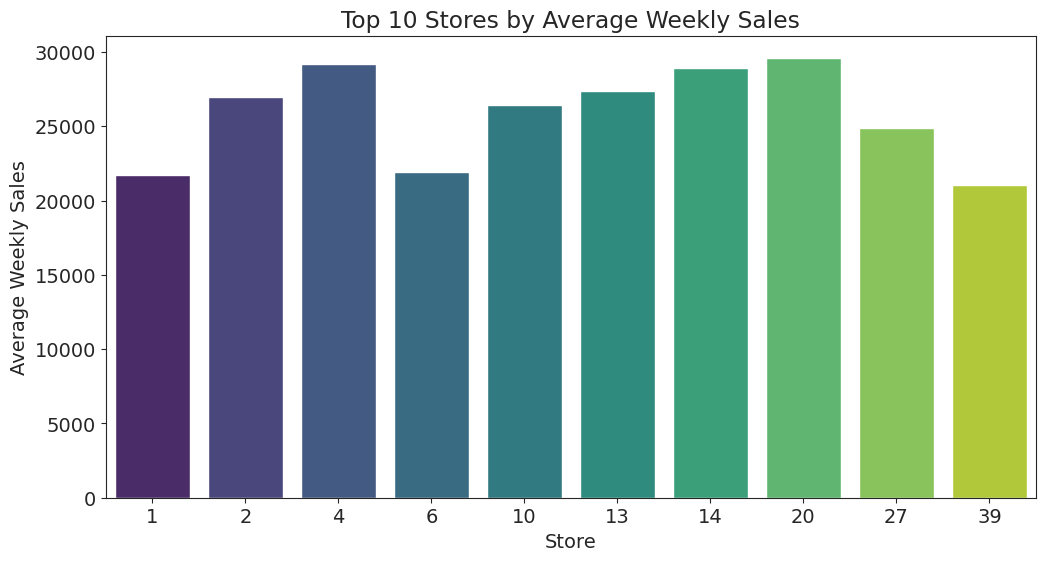

In [173]:
per_stores_sales(merged_df,False)

/tmp/ipython-input-875535067.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store', y='Weekly_Sales', data=store_sales, palette='viridis')


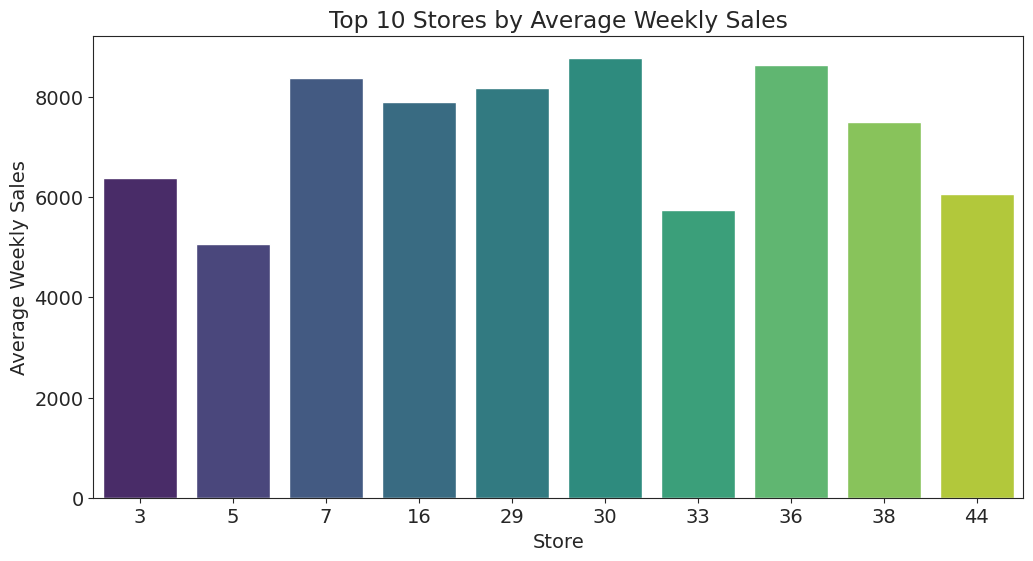

In [174]:
per_stores_sales(merged_df,True)

In [175]:
def per_dept_sales(df,bottom):
  dept_sales = df.groupby('Dept')['Weekly_Sales'].mean().reset_index()
  dept_sales = dept_sales.sort_values("Weekly_Sales",ascending=bottom).head(10)
  plt.figure(figsize=(12, 6))
  sns.barplot(x='Dept',y='Weekly_Sales',data=dept_sales,palette ='viridis')
  plt.xlabel('Dept')
  plt.ylabel('Average Weekly Sales')
  plt.title('Top 10 Dept by Average Weekly Sales')
  plt.xticks(rotation=0)
  plt.show()

/tmp/ipython-input-269835328.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dept',y='Weekly_Sales',data=dept_sales,palette ='viridis')


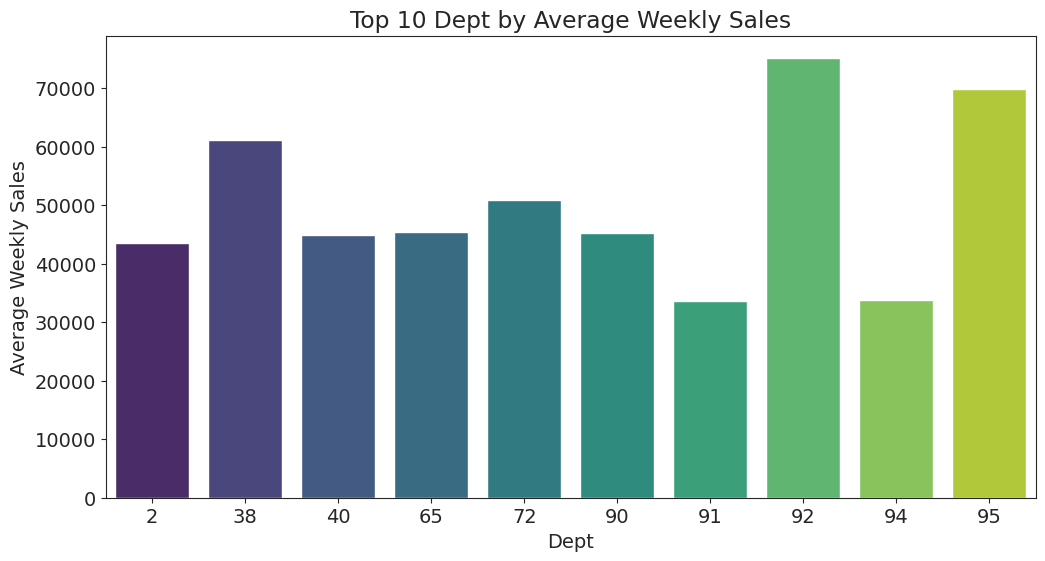

In [176]:
per_dept_sales(merged_df,False)

/tmp/ipython-input-269835328.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dept',y='Weekly_Sales',data=dept_sales,palette ='viridis')


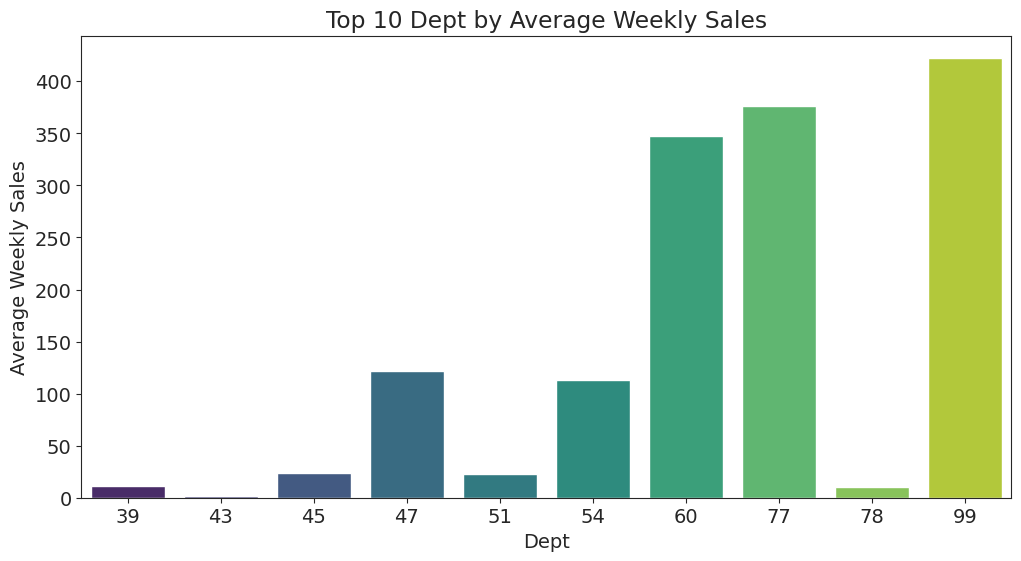

In [177]:
per_dept_sales(merged_df,True)

In [178]:
def create_performer_feat(df):


  df["Top_Store"]=np.where(np.isin(df['Store'],np.array([1,2,4,6,10,13,14,20,27,39])),1,0)
  df["Bottom_Store"]=np.where(np.isin(df['Store'],np.array([3,5,7,16,29,30,33,36,38,44])),1,0)



  df['Top_Dept'] =np.where(np.isin(df['Dept'],np.array([2,38,40,65,72,90,91,92,94,95])),1,0)
  df['Bottom_dept'] =np.where(np.isin(df['Dept'],np.array([39,43,45,47,51,54,60,77,78,99])),1,0)


  return df

In [179]:
create_performer_feat(merged_df)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,HoliDay_MarkDown,pct_MarkDown1,pct_MarkDown2,pct_MarkDown3,pct_MarkDown4,pct_MarkDown5,Top_Store,Bottom_Store,Top_Dept,Bottom_dept
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.00,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.00,0.00,0.00,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.00,0.00,0.00,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.00,0.00,0.00,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.00,0.00,0.00,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,64.88,3.997,4556.61,20.64,1.50,...,0.0,0.481264,0.002180,0.000158,0.169097,0.347301,0,0,0,0
421566,45,98,2012-10-05,628.10,0,64.89,3.985,5046.74,0.00,18.82,...,0.0,0.522491,0.000000,0.001948,0.233298,0.242262,0,0,0,0
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,1956.28,0.00,7.89,...,0.0,0.298485,0.000000,0.001204,0.091443,0.608868,0,0,0,0
421568,45,98,2012-10-19,760.01,0,56.47,3.969,2004.02,0.00,3.18,...,0.0,0.503217,0.000000,0.000799,0.109916,0.386069,0,0,0,0


In [180]:
store_rank_df = merged_df.groupby("Store",as_index=False)['Weekly_Sales'].mean()
store_rank_df = store_rank_df.sort_values('Weekly_Sales',ascending=False)
store_rank_df["Store_Rank"] =store_rank_df['Weekly_Sales'].rank(ascending=False).astype(int)
store_rank_df.drop(columns=["Weekly_Sales"],inplace=True)

In [181]:
store_rank_df.head(5)

,Store,Store_Rank
19,20,1
3,4,2
13,14,3
12,13,4
1,2,5


In [182]:
dept_rank_df = merged_df.groupby("Dept",as_index=False)['Weekly_Sales'].mean()
dept_rank_df = dept_rank_df.sort_values('Weekly_Sales',ascending=False)
dept_rank_df['Dept_Rank']= dept_rank_df['Weekly_Sales'].rank(ascending=False).astype(int)
dept_rank_df.drop(columns=["Weekly_Sales"],inplace=True)

In [183]:
dept_rank_df.head(5)

,Dept,Dept_Rank
73,92,1
76,95,2
36,38,3
60,72,4
57,65,5


In [184]:
merged_df= pd.merge(merged_df,store_rank_df,on="Store",how="left")
merged_df= pd.merge(merged_df,dept_rank_df,on="Dept",how="left")

In [185]:
merged_df.sample(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,pct_MarkDown2,pct_MarkDown3,pct_MarkDown4,pct_MarkDown5,Top_Store,Bottom_Store,Top_Dept,Bottom_dept,Store_Rank,Dept_Rank
91721,10,35,2010-02-05,7586.00,0,54.34,2.962,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,1,0,0,0,6,60
116548,12,95,2012-05-11,45189.37,0,77.27,4.186,13083.53,0.00,8.54,...,0.000000,0.000516,0.083344,0.125215,0,0,1,0,21,2
336507,35,83,2010-12-10,3869.68,0,30.83,3.109,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,23,58
157605,17,9,2012-09-21,29688.06,0,58.43,3.821,6035.13,1.91,14.50,...,0.000146,0.001112,0.065903,0.470168,0,0,0,0,28,19
260436,27,40,2011-11-11,70552.20,0,49.69,3.719,10710.56,44021.61,475.30,...,0.683956,0.007385,0.065800,0.076451,1,0,1,0,7,7
